# Gaussian Distribution
> Objectives:
    - Observe normal distribution properties in a ~real data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('vehicles/vehicles_messy.csv', low_memory=False)

In [3]:
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


Input NAN? Not always.

>   Example - Cheque devolvido = 0 _vs_ Cheque devolvido = NaN

>   Symbolic missing

# Outliers (!)

>    - Several methods:
        - Interquartile range ($\approx$2.7$\sigma$)
        - \> 3$\sigma$ (standard-deviations)
        - Cap on specified quantile

In [4]:
data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,37843.000000,37843.000000,37843.0,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,...,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000
mean,17.532506,0.216169,0.0,0.023531,17.941389,4.042737,0.520149,0.327163,0.000406,0.184790,...,22.587229,0.652380,33.619221,0.933845,2000.064398,-2658.999022,0.004360,0.069313,0.068203,0.068573
std,4.575950,1.141527,0.0,0.427647,6.660360,9.645820,3.837874,3.542596,0.039918,2.904558,...,9.350163,5.284547,10.048326,6.059456,10.390588,2553.098329,0.142776,1.966806,1.871986,1.913647
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-22250.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,0.000000,27.100000,0.000000,1990.000000,-4250.000000,0.000000,0.000000,0.000000,0.000000
50%,17.347895,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,0.000000,33.000000,0.000000,2001.000000,-2500.000000,0.000000,0.000000,0.000000,0.000000
75%,20.600625,0.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.139300,0.000000,38.109600,0.000000,2009.000000,-750.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,138.000000,138.304000,127.000000,127.093000,5.350000,122.000000,...,197.577100,181.560900,159.100000,152.187800,2017.000000,4000.000000,7.000000,97.000000,79.000000,88.000000


In [5]:
stats = data.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143,6.269755
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667,0.000000
charge120,37843.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000,0.000000
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000,5.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000,0.000000
cityA08,37843.0,0.520149,3.837874,0.00,0.00000,0.000000,0.000000,127.000000,0.000000
cityA08U,37843.0,0.327163,3.542596,0.00,0.00000,0.000000,0.000000,127.093000,0.000000
cityCD,37843.0,0.000406,0.039918,0.00,0.00000,0.000000,0.000000,5.350000,0.000000
cityE,37843.0,0.184790,2.904558,0.00,0.00000,0.000000,0.000000,122.000000,0.000000


# Visualizing outlier rules using variable distributions
    - Inter-quartile range rule
    - 3 standard-deviation rule

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

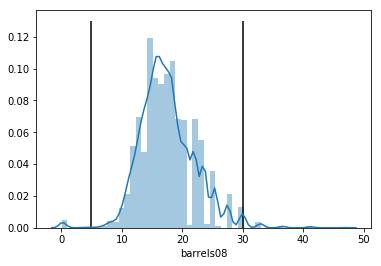

In [7]:
sns.distplot(data.barrels08)
plt.vlines(x=(stats.loc['barrels08']['25%'] - stats.loc['barrels08']['IQR'] * 1.5 ), ymin=0, ymax=0.13)
plt.vlines(x=(stats.loc['barrels08']['75%'] + stats.loc['barrels08']['IQR'] * 1.5 ), ymin=0, ymax=0.13)
plt.show()

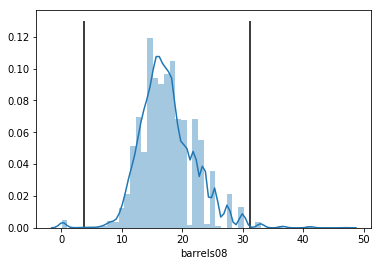

In [8]:
sns.distplot(data.barrels08)
plt.vlines(x=(stats.loc['barrels08']['mean'] - stats.loc['barrels08']['std'] * 3 ), ymin=0, ymax=0.13)
plt.vlines(x=(stats.loc['barrels08']['mean'] + stats.loc['barrels08']['std'] * 3 ), ymin=0, ymax=0.13)
plt.show()

# Non-normal distribution
> Now suppose you have a variable with a distribution far from a Normal distribution. Like pv2 for instance. What would happen?

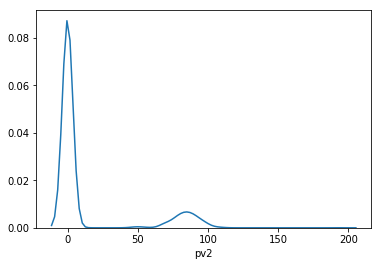

In [9]:
sns.distplot(data.pv2, hist=False)

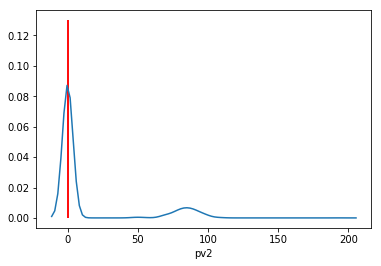

In [10]:
# it only works for normal distribution
sns.distplot(data.pv2, hist=False)
plt.vlines(x=(stats.loc['pv2']['25%'] - stats.loc['pv2']['IQR'] * 1.5 ), ymin=0, ymax=0.13, color='red')
plt.vlines(x=(stats.loc['pv2']['75%'] + stats.loc['pv2']['IQR'] * 1.5 ), ymin=0, ymax=0.13, color='red')
plt.show()


In [11]:
# why?
stats.loc['pv2']

count    37843.000000
mean        13.696113
std         31.269930
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        194.000000
IQR          0.000000
Name: pv2, dtype: float64